## error_pos_plotter.ipynb

Jupyter notebook whose aim is to plot the position error for each individual electrode. Based on logs after ICP post-processing.

Author: Kieran Le Mouël

Date: 07/07/2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats
import matplotlib.patches as mpatches

In [2]:
# path_NAS = "/home/klemouel/NAS_EMPENN/share/users/klemouel/Stage/"
path_NAS = 'C:\\Users\\kiera\\Documents\\Unlimited_Home_Works\\Internship2025\\data\\'
path_proc = path_NAS + "post_processing\\T1_65\\pos_errors\\"
path_trans = path_NAS + 'trans\\'
path_CSV = path_NAS + "Correspondancies_ElectrodeDetection_Dataset.csv"

In [3]:
corr = pd.read_csv(path_CSV) # Reading the CSV
database = [] # Initialize empty list that will contain the read logging data
database_brainstorm = []

In [4]:
electrodes = {
    1: "FP2", 2: "FPZ", 3: "FP1", 4: "AF7", 5: "AF3", 6: "AFZ", 7: "AF4", 8: "AF8", 9: "F8", 10: "F6",
    11: "F4", 12: "F2", 13: "FZ", 14: "F1", 15: "F3", 16: "F5", 17: "F7", 18: "FT9", 19: "FT7", 20: "FC5",
    21: "FC3", 22: "FC1", 23: "FCZ", 24: "FC2", 25: "FC4", 26: "FC6", 27: "FT8", 28: "FT10", 29: "T8", 30: "C6",
    31: "C4", 32: "C2", 33: "CZ", 34: "C1", 35: "C3", 36: "C5", 37: "T7", 38: "TP9", 39: "TP7", 40: "CP5",
    41: "CP3", 42: "CP1", 43: "CPZ", 44: "CP2", 45: "CP4", 46: "CP6", 47: "TP8", 48: "TP10", 49: "P8", 50: "P6",
    51: "P4", 52: "P2", 53: "PZ", 54: "P1", 55: "P3", 56: "P5", 57: "P7", 58: "PO7", 59: "PO3", 60: "POZ",
    61: "PO4", 62: "PO8", 63: "O2", 64: "OZ", 65: "O1"
} # Dictionnary to associate case number with electrode name

test_set = [
    "003", "004", "007", "008", "011", "012", "023", "024", "025", "029",
    "030", "031", "036", "037", "038", "039", "040", "059", "060"
]

In [5]:
def load_all_data(l: list[str], path: str) -> None:
    """
    Function used to load all logging data into a list. Data loaded as a string.

    Keyword argument:

    l -- list of strings used to store loaded data

    path -- path to data to load
    """
    for i, row in corr.iterrows():
        if(row['Set'] == "test"):
            id = str(row['Id'])
            id = id.rjust(3,'0')

            with open(path + id +"_err.txt", 'r') as f:
                data = f.read()
                l.append(data)

load_all_data(database, path_proc)

In [6]:
def get_err_values(data: str) -> list:
    """
    Function used to get float error values from loaded data string.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    l = []
    for i in tmp:
        haha = i.split(" ")
        l.append(float(haha[1]))
    return l

In [7]:
def get_values_dict(data: str) -> dict:
    """
    Function used to get dictionary matching case number with float error value.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    d = {}
    for i in tmp:
        hehe = i.split(" ")
        d[float(hehe[0])] = float(hehe[1])
    return d

In [8]:
def avg(li: list[float]) -> float:
    """
    Function used to get the average value of a list of numerical values

    Keyword argument:

    li -- list to average
    """
    res = 0
    for i in range(0, len(li)):
        res += li[i]
    return res/len(li)

In [9]:
def std(li: list[float]) -> float:
    """
    Function used to compute the standard deviation of a list of numerical values

    Keyword arguments:

    li -- list of values
    """
    res = 0
    mean = avg(li)
    for val in li:
        res += np.power((val - mean),2)
    return sqrt(res)

In [10]:
def count_average(l: list[str]) -> float:
    """
    Function used to get the overall average of a list of loaded data.

    Keyword argument:

    l -- list of loaded data strings
    """
    res = 0
    for data in l:
        res += avg(get_err_values(data))
    return res/len(l)

In [11]:
def smooth(scalars: list[float], weight: float) -> list[float]:
    """
    Smoothing function using the Exponential moving average.

    Keywords arguments:
    
    scalars -- list of floats to be smoothed

    weight -- float value that handles smoothing aggressiveness
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1-weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

In [12]:
l = [] # List of average error values
stds = []
vals = [] # List of lists containing error values
def __main__():
    sorted_list = []
    for data in database:
        d = get_values_dict(data)
        sorted_list = sorted(d)
        tmp = []
        for i in sorted_list:
            tmp.append(d[i])
        l.append(tmp)
        stds.append(np.std(tmp))
        vals.append(tmp)
    # print(vals)
    
    # for m in range(0, len(sorted_list)):
    #     res = []
    #     for n in range(0, len(vals)):
    #         res.append(vals[n][m])
    #     l.append(res)
    # return None

__main__()

print(np.std(l))

1.8294748837926769


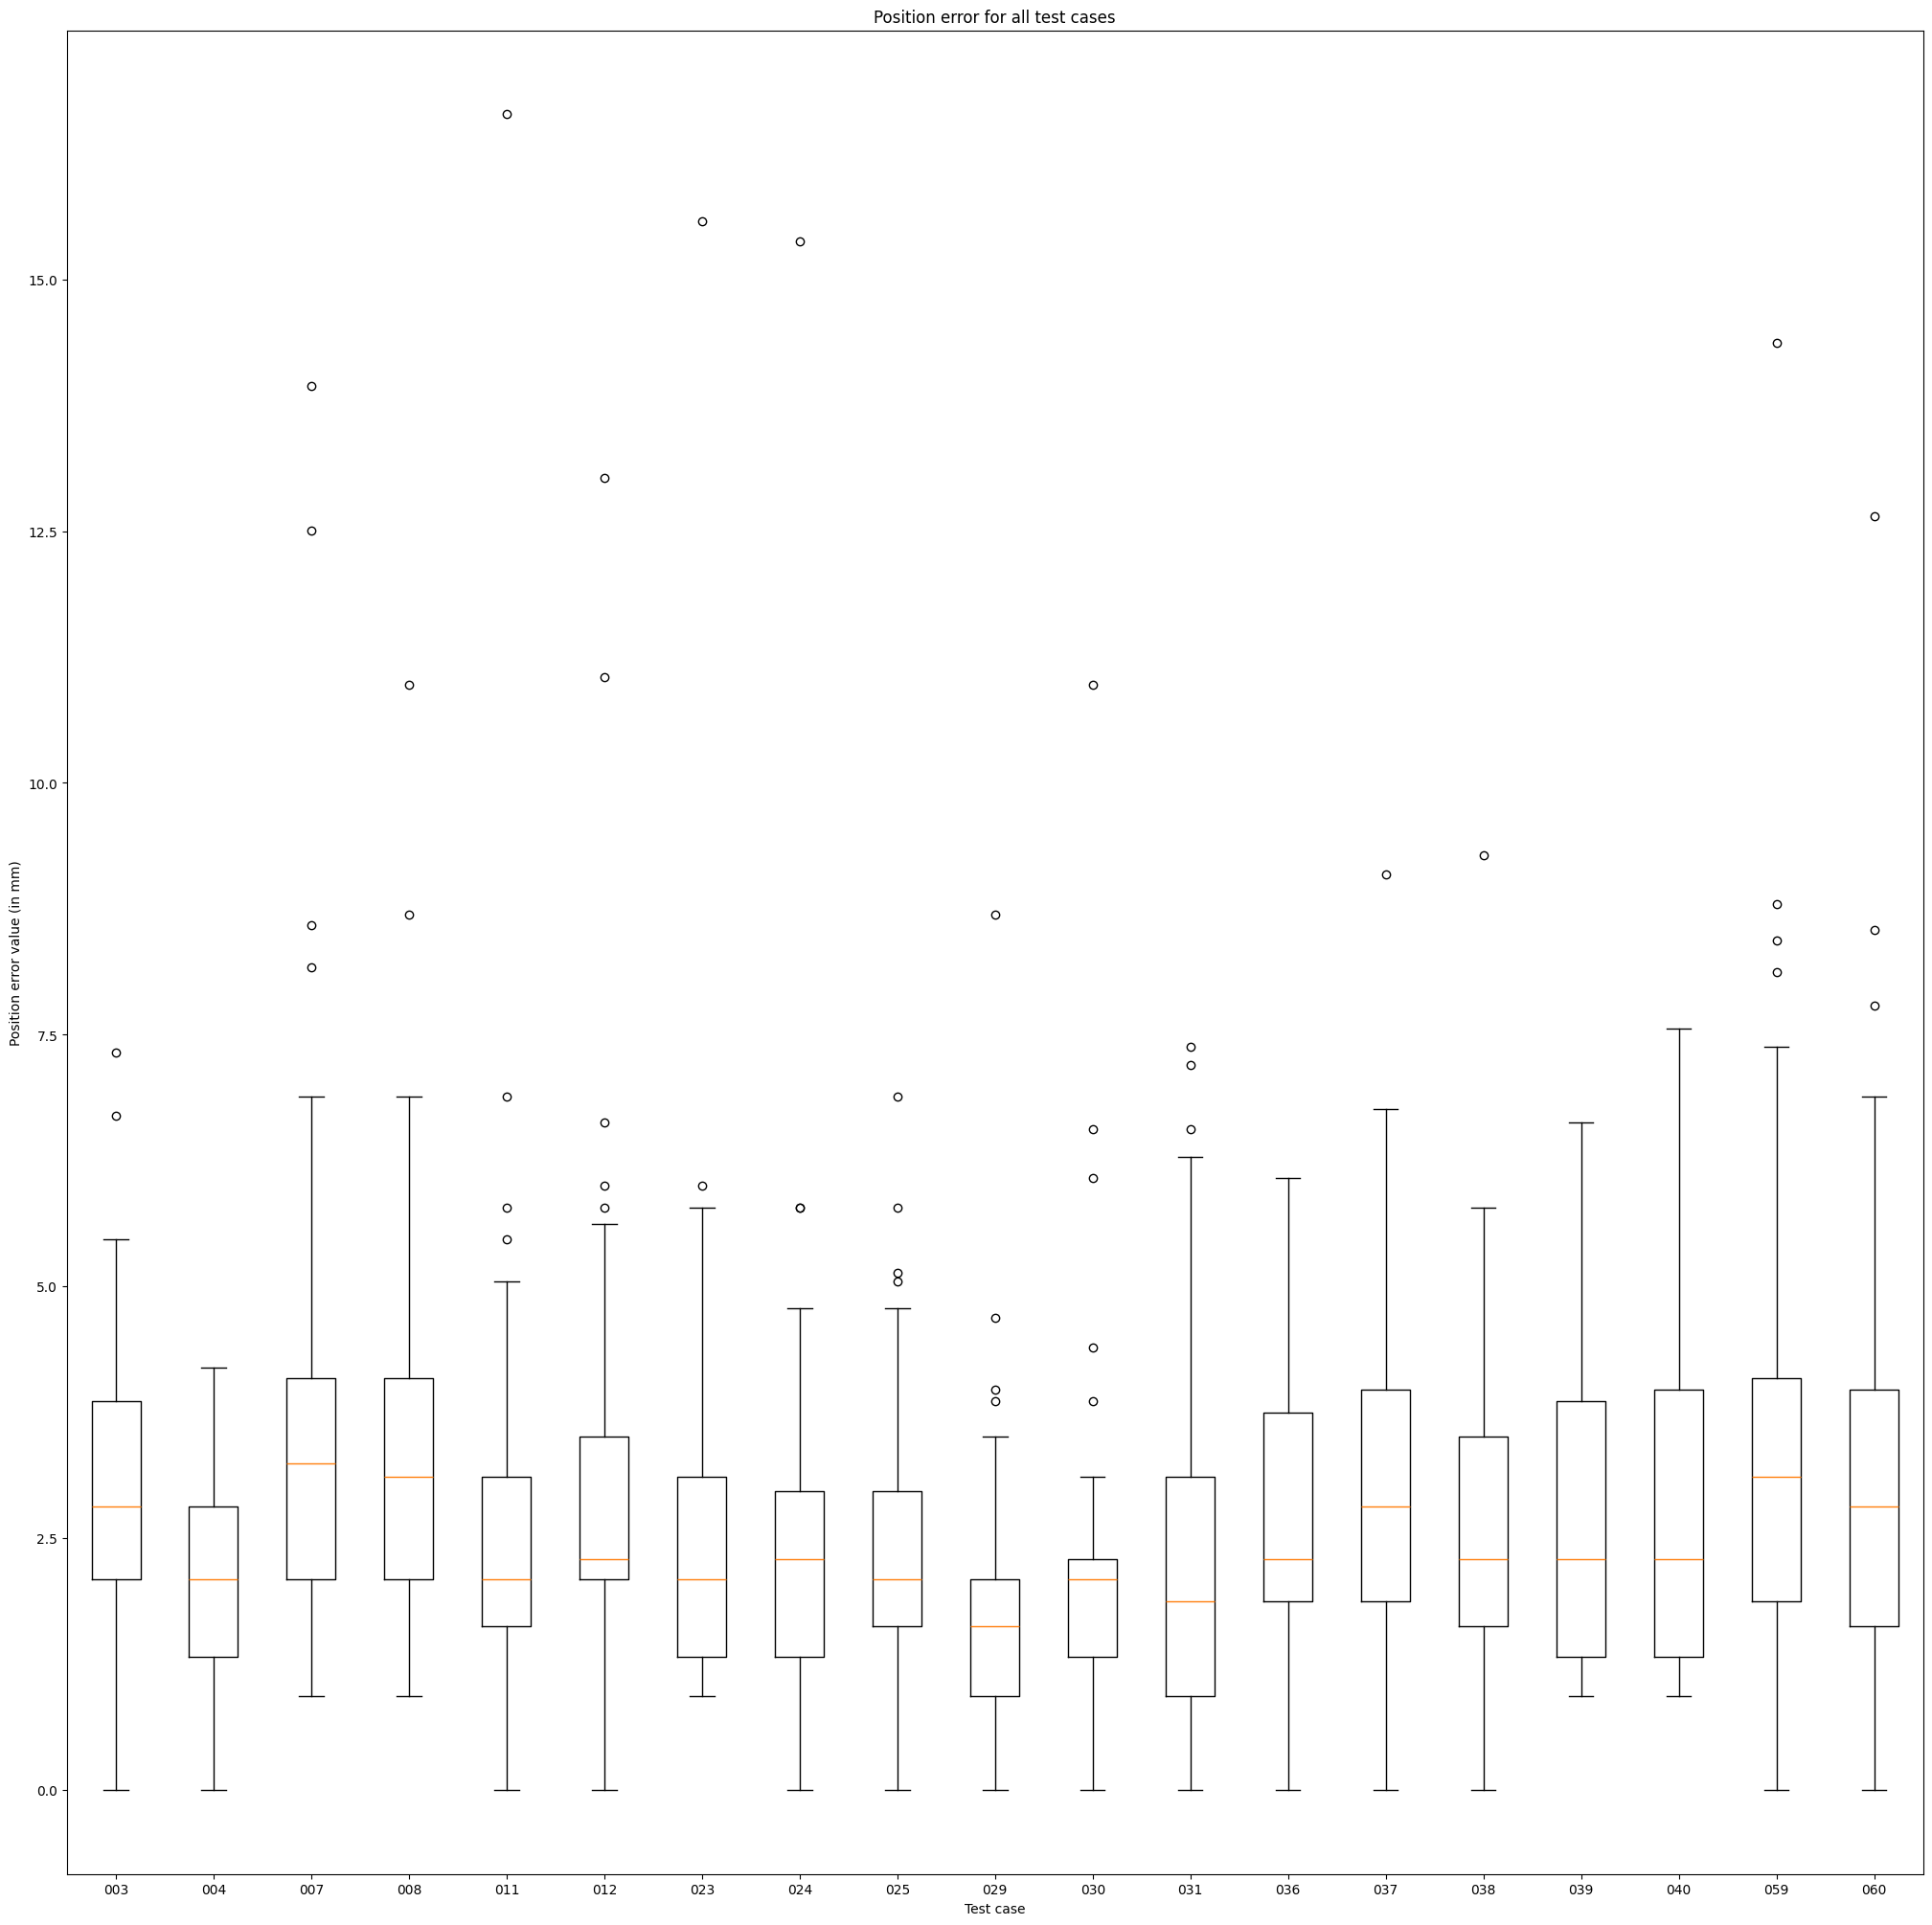

In [39]:
# Plot average error values for the 19 test cases
fig, ax = plt.subplots(1,1,figsize=(25,25))
x = np.arange(1,20,1)
ax.boxplot(l)
ax.set_title("Position error for all test cases")
ax.set_xlabel("Test case")
ax.set_ylabel("Position error value (in mm)")
ax.set_xticks(np.arange(1,20,1));
plt.xticks(np.arange(1,20,1), test_set);
# x = 0
# y = 0
# for i in range(0,65):
#     res = []
#     for j in range(0,len(l[i])):
#         res.append(l[i][j])
#     # p = smooth(res, 0.9)
    # x += 1
    # if (i+1)%5 == 0:
    #     x = 0
    # if x == 0:
    #     y += 1

In [34]:
electrodes = [
    "FP2", "FPZ", "FP1", "AF7", "AF3", "AFZ", "AF4", "AF8", "F8", "F6",
    "F4", "F2", "FZ", "F1", "F3", "F5", "F7", "FT9", "FT7", "FC5",
    "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "FT10", "T8", "C6",
    "C4", "C2", "CZ", "C1", "C3", "C5", "T7", "TP9", "TP7", "CP5",
    "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "TP10", "P8", "P6",
    "P4", "P2", "PZ", "P1", "P3", "P5", "P7", "PO7", "PO3", "POZ",
    "PO4", "PO8", "O2", "OZ", "O1"
] # Dictionary matching case number with electrode name

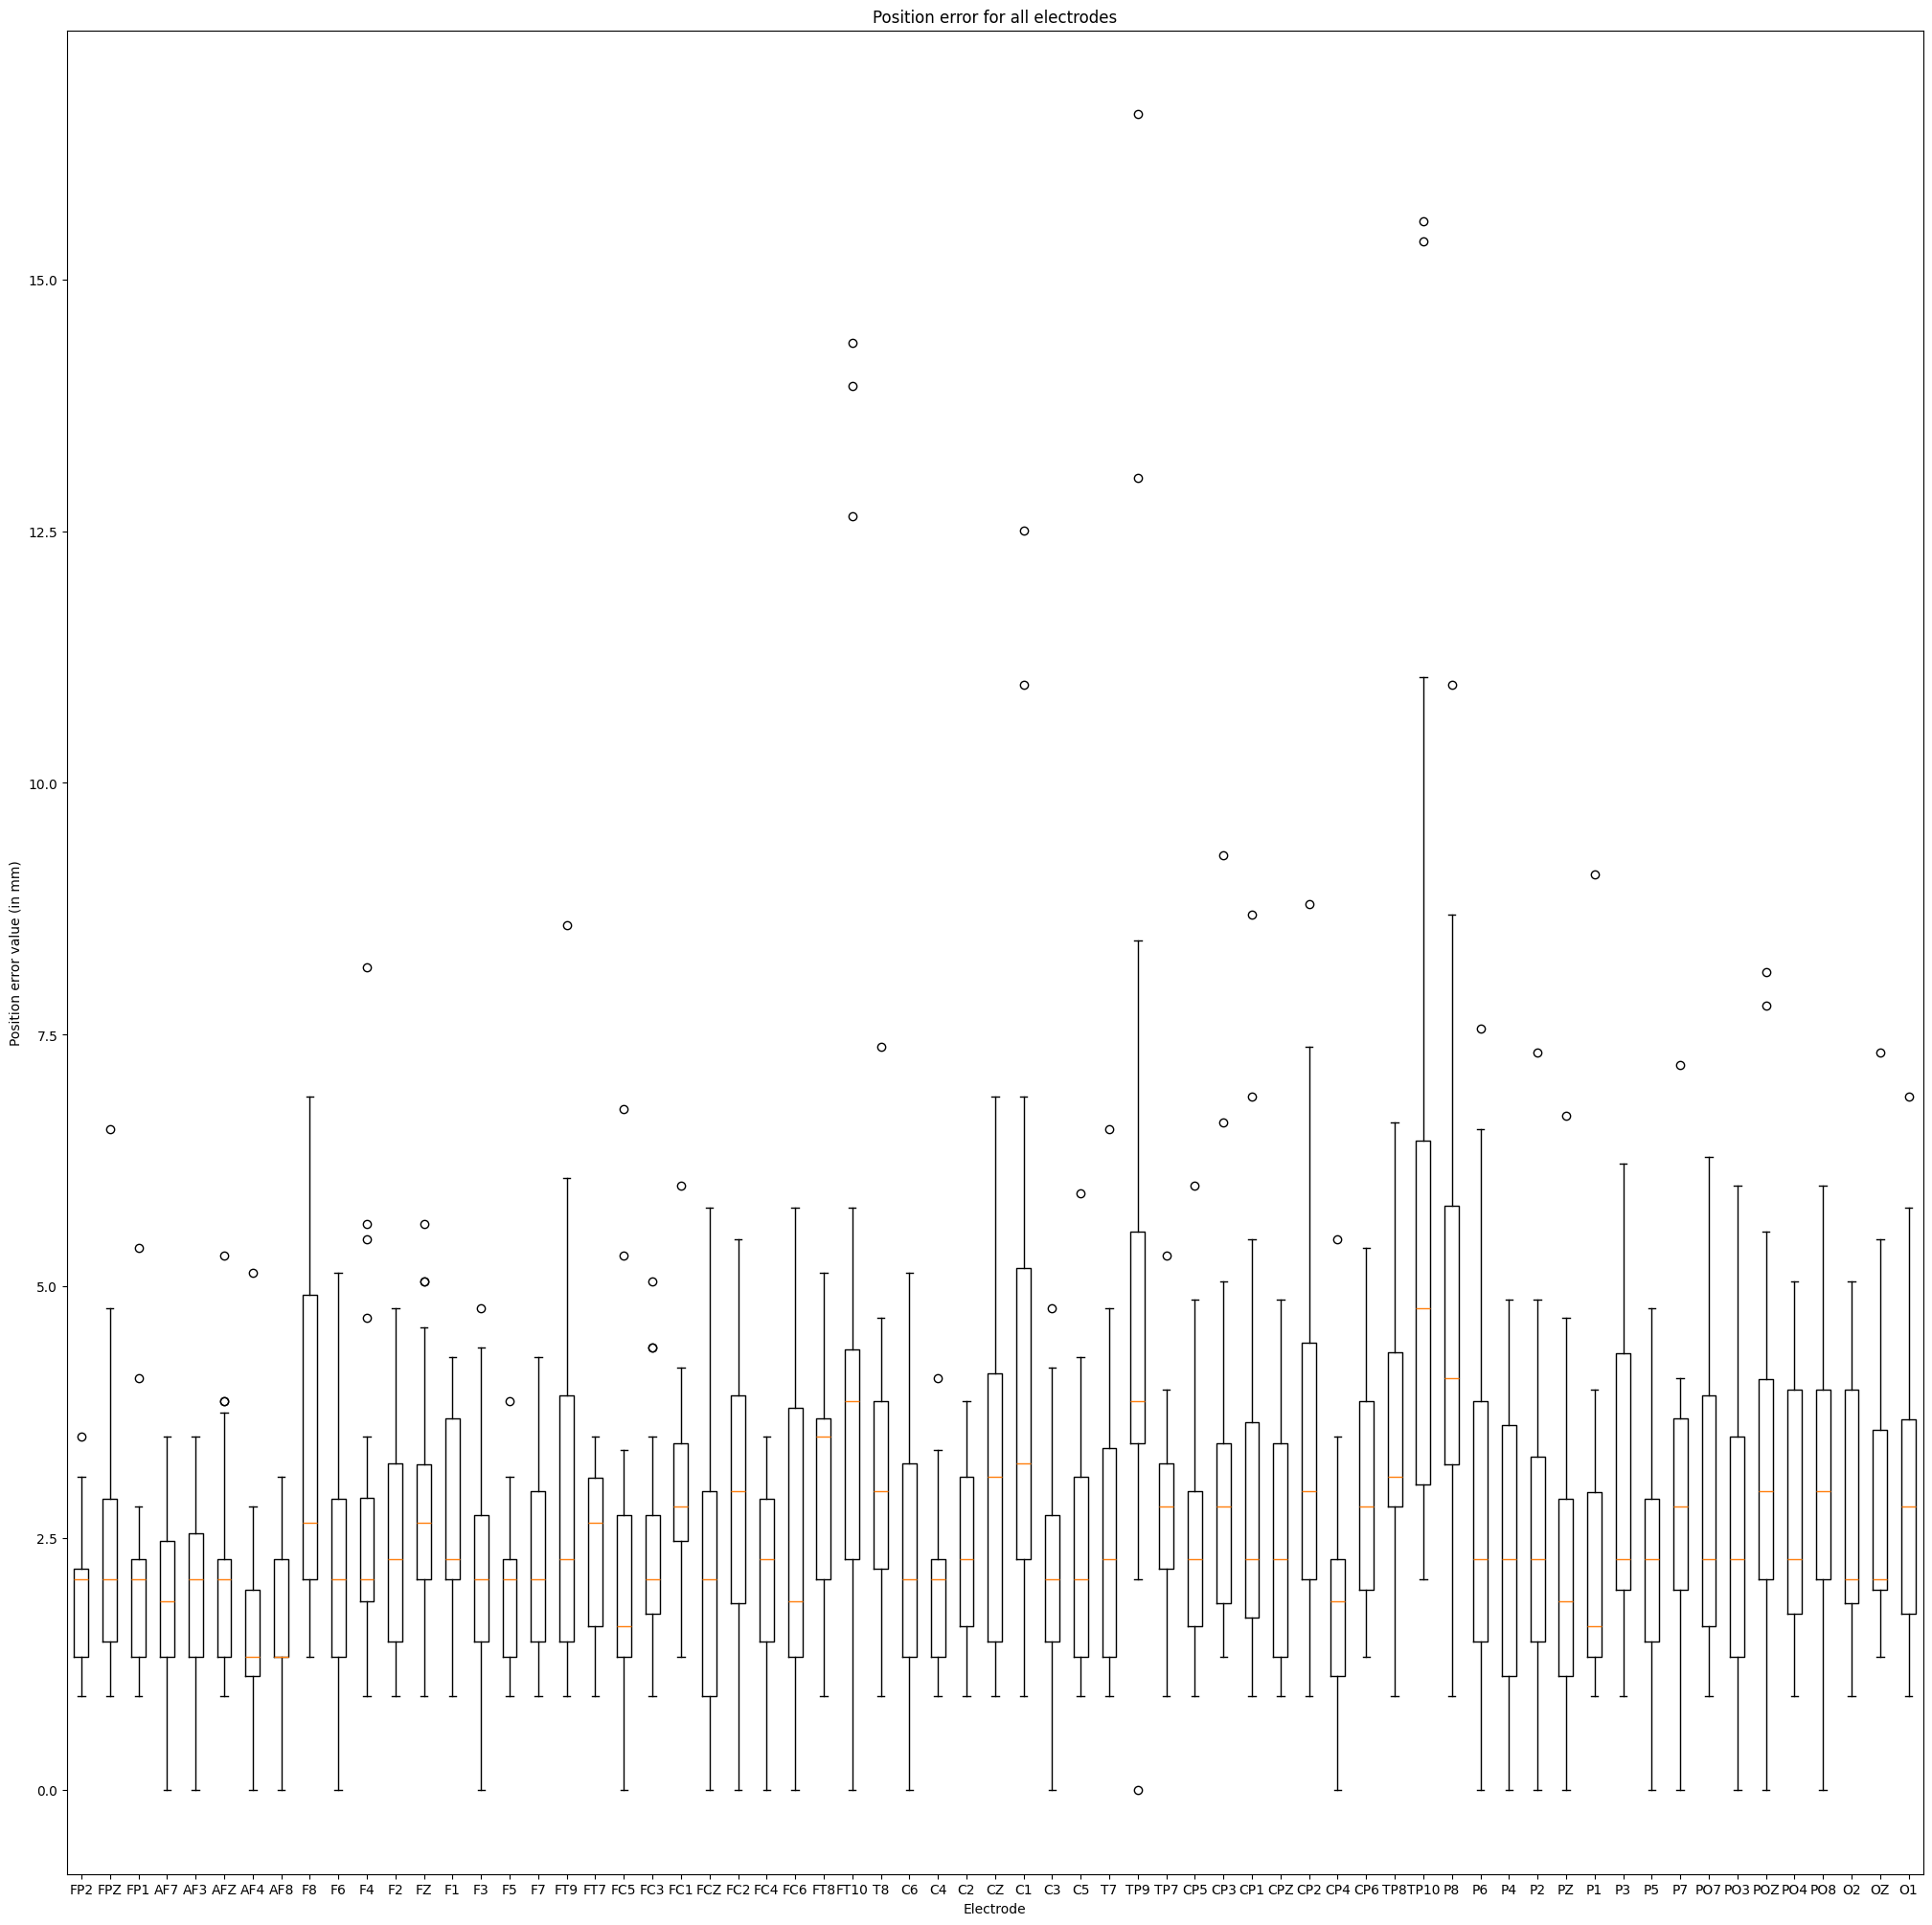

In [38]:
# Plot error values for each electrode for the 19 test cases
fig, ax = plt.subplots(1,1,figsize=(25,25))
x = 0
y = 0
reses = []
for i in range(0,65):
    res = []
    for j in range(0,19):
        res.append(l[j][i])
    reses.append(res)
# je crois que la ligne au dessus indique que les données ne suivent pas une loi normale
ax.boxplot(reses);
ax.set_title("Position error for all electrodes")
ax.set_xlabel("Electrode")
ax.set_ylabel("Position error value (in mm)")
plt.xticks(np.arange(1,66,1), electrodes);


In [15]:
ttests_stats = []
ttests_pvalue = []

for i in range(0,65):
    s = []
    p = []
    for j in range(0,65):
        s.append(scipy.stats.ttest_ind(reses[j], reses[i])[0])
        p.append(0 if np.rint(np.log10(scipy.stats.ttest_rel(reses[j], reses[i])[1])) <= -2/((np.power(65,2)-65)) else 1)
    ttests_stats.append(s)
    ttests_pvalue.append(p)

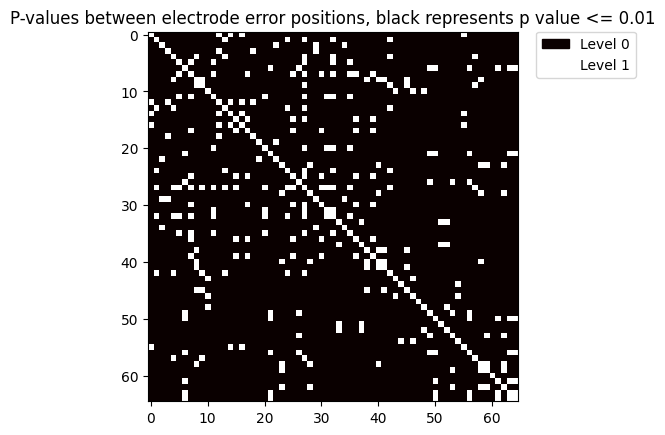

In [16]:
p_values = np.unique(np.array(ttests_pvalue).ravel())
plt.figure()
im = plt.imshow(ttests_pvalue, interpolation='none', cmap='hot')
colors = [im.cmap(im.norm(value)) for value in p_values]
patches = [mpatches.Patch(color=colors[i], label="Level {l}".format(l=p_values[i])) for i in range(len(p_values))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("P-values between electrode error positions, black represents p value <= 0.01");

# i don't understand what any of this means

In [17]:
icp = [(241, 113, 134), (84, 104, 140), (239, 173, 144), (81, 165, 151), (236, 85, 167), (242, 112, 167), (244, 143, 169), (220, 63, 170), (197, 45, 172), (112, 54, 172), (92, 76, 172), (135, 40, 173), (167, 38, 174), (83, 102, 175), (79, 133, 177), (240, 171, 179), (79, 160, 185), (233, 198, 188), (86, 188, 193), (229, 75, 195), (100, 69, 198), (237, 105, 200), (218, 224, 200), (130, 50, 203), (201, 54, 203), (101, 216, 204), (240, 136, 205), (87, 98, 206), (167, 48, 208), (234, 167, 210), (84, 130, 211), (191, 241, 211), (225, 198, 214), (126, 239, 214), (88, 160, 215), (218, 73, 218), (95, 190, 219), (158, 248, 219), (114, 66, 223), (224, 104, 232), (195, 224, 232), (224, 134, 235), (104, 96, 237), (218, 163, 237), (209, 197, 237), (127, 219, 237), (137, 68, 238), (195, 75, 239), (166, 66, 241), (101, 126, 241), (112, 189, 242), (106, 158, 243), (160, 222, 248), (198, 99, 249), (133, 93, 252), (189, 189, 255), (196, 126, 256), (164, 94, 257), (195, 157, 257), (134, 186, 257), (133, 123, 259), (132, 154, 260), (162, 190, 262), (167, 122, 265), (163, 156, 266)]
brainstorm = [(233.28, 147.63, 110.1), (87.751, 133.96, 118.02), (226.58, 186.24, 142.94), (88.375, 173.75, 150.49), (233.48, 101.77, 123.49), (237.8, 126.73, 138.51), (239.68, 148.88, 155.4), (222.73, 75.735, 109.87), (200.61, 51.567, 103.43), (110.68, 65.377, 115.39), (96.309, 89.302, 129.74), (135.77, 44.901, 106.41), (169.33, 37.472, 106.41), (88.85, 111.66, 145.72), (85.24, 133.24, 162.59), (233.52, 168.82, 169.65), (88.415, 154.62, 177.29), (224.51, 186.0, 188.57), (95.513, 173.59, 195.83), (231.34, 80.6, 143.41), (102.96, 68.778, 148.78), (237.87, 104.38, 162.95), (208.07, 198.99, 204.74), (133.0, 35.987, 137.02), (206.7, 43.7, 132.84), (111.08, 190.01, 210.38), (238.77, 126.85, 182.53), (94.081, 89.213, 170.07), (172.37, 26.813, 145.24), (234.14, 150.35, 198.34), (90.266, 111.61, 190.3), (186.01, 205.21, 218.64), (222.7, 172.31, 212.93), (133.43, 200.29, 221.89), (92.208, 136.3, 205.79), (220.27, 60.995, 161.92), (101.99, 160.93, 220.81), (160.33, 202.54, 227.33), (119.34, 49.639, 166.15), (225.96, 82.898, 185.57), (195.51, 183.55, 234.06), (228.76, 105.75, 208.7), (112.1, 70.333, 192.07), (224.56, 131.81, 226.45), (212.45, 159.2, 235.15), (129.46, 178.35, 239.33), (143.66, 38.764, 178.35), (199.89, 45.707, 175.73), (173.54, 35.822, 182.51), (106.81, 92.372, 216.69), (115.65, 149.57, 242.43), (107.71, 120.06, 233.75), (163.89, 174.63, 246.24), (203.93, 65.813, 203.51), (140.07, 58.21, 207.41), (192.19, 148.65, 250.24), (204.25, 89.41, 227.6), (173.29, 55.702, 212.57), (201.14, 117.13, 245.01), (139.13, 142.86, 254.73), (137.07, 81.959, 232.28), (135.85, 110.42, 249.43), (167.46, 143.07, 257.91), (172.23, 80.588, 236.83), (170.32, 110.02, 252.57)]

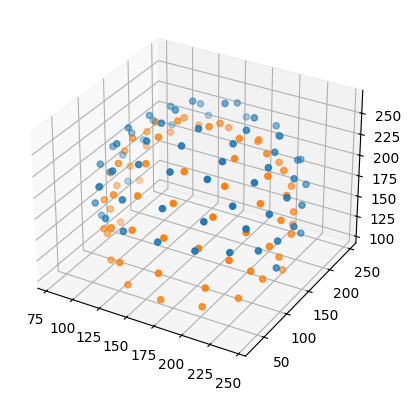

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = []
ys = []
zs = []

xs2 = []
ys2 = []
zs2 = []

for i in range(0,64):
    xs.append(icp[i][0])
    ys.append(icp[i][1])
    zs.append(icp[i][2])

    xs2.append(brainstorm[i][0])
    ys2.append(brainstorm[i][1])
    zs2.append(brainstorm[i][2])

ax.scatter(xs, ys, zs)
ax.scatter(xs2, ys2, zs2)

In [19]:
def load_all_data_2(l: list[str], path: str) -> None:
    """
    Function used to load all logging data into a list. Data loaded as a string.

    Keyword argument:

    l -- list of strings used to store loaded data

    path -- path to data to load
    """
    for i, row in corr.iterrows():
        if(row['Set'] == "test"):
            id = str(row['Id'])
            id = id.rjust(3,'0')

            with open(path + "ID_" + id +"_distances.txt", 'r') as f:
                data = f.read()
                l.append(data)

In [20]:
def get_err_values_2(data: str) -> list:
    """
    Function used to get float error values from loaded data string.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    l = []
    for i in tmp:
        l.append(float(i))
    return l

In [21]:
path_brainstorm = path_NAS + "trans\\distances\\"
database_brainstorm = []
load_all_data_2(database_brainstorm, path_brainstorm)

print(len(database_brainstorm))

19


In [22]:
l2 = [] # List of average error values
stds2 = []
vals2 = [] # List of lists containing error values
def __main2__():
    for data in database_brainstorm:
        tmp = get_err_values_2(data)
        l2.append(tmp)
        stds2.append(np.std(tmp))

__main2__()

In [23]:
print(len(l2))
print(np.std(l2))

19
8.901653973565757


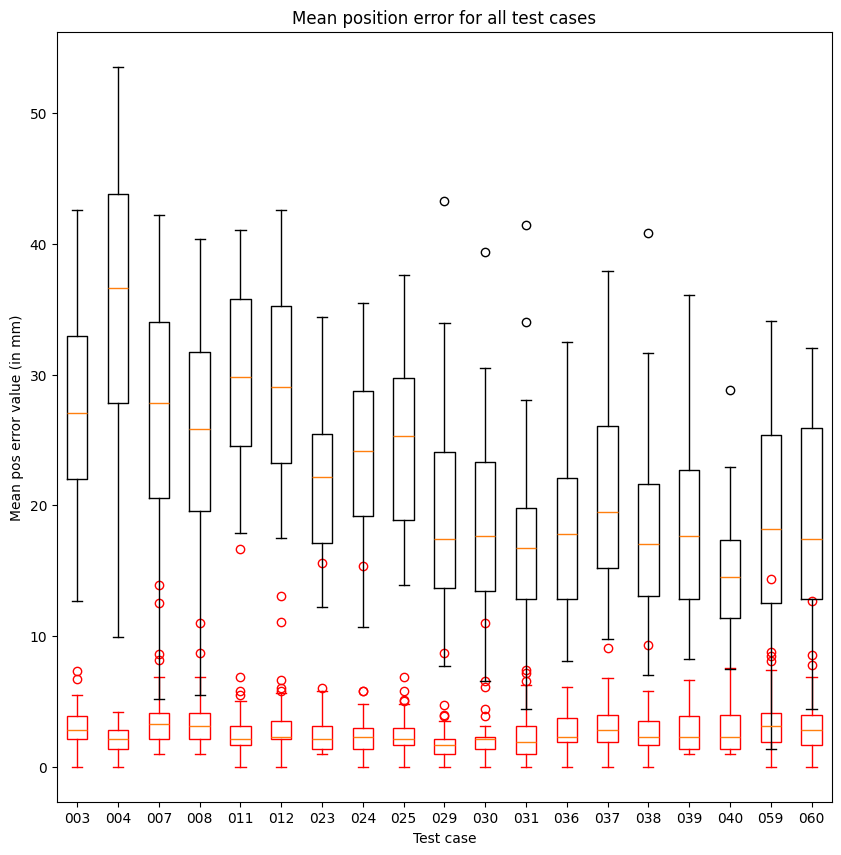

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
x2 = np.arange(1,20,1)
x = np.arange(1,20,1)
ax.boxplot(l, patch_artist=True,
           boxprops=dict(facecolor="white", color="red"),
           capprops=dict(color="red"),
           whiskerprops=dict(color="red"),
           flierprops=dict(color="red", markeredgecolor="red"))
ax.boxplot(l2)
# ax.errorbar(x2, l2, stds2, marker='o')
# ax.errorbar(x, l, stds, marker='*')
ax.set_title("Mean position error for all test cases")
ax.set_xlabel("Test case")
ax.set_ylabel("Mean pos error value (in mm)")
ax.set_xticks(np.arange(1,20,1));
plt.xticks(np.arange(1,20,1), test_set);

In [25]:
# Plot error values for each electrode for the 19 test cases
print(len(vals2[1]))
fig, ax = plt.subplots(1,1,figsize=(20,20))
x = 0
y = 0
reses = []
for i in range(0,len(vals2)-1):
    res = []
    for j in range(0,len(vals2[i])-1):
        res.append(vals2[i][j])
    electrode_values = smooth(res, 0.9)
    reses.append(electrode_values)
ax.plot(np.array(reses));

IndexError: list index out of range